C:\Users\Datebayo\ana\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Datebayo\ana\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Datebayo\ana\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Datebayo\ana\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Datebayo\ana\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: Us

60 50 10
34.75907029478457


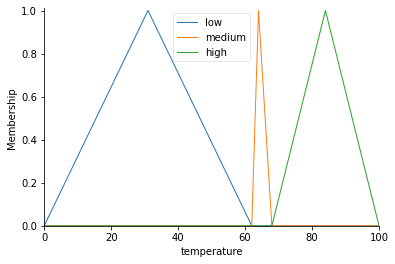

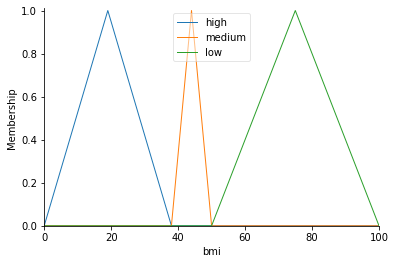

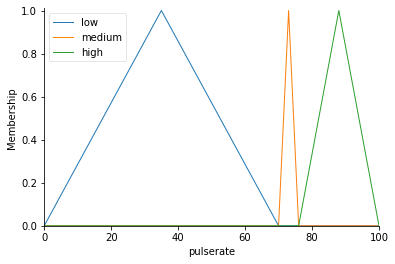

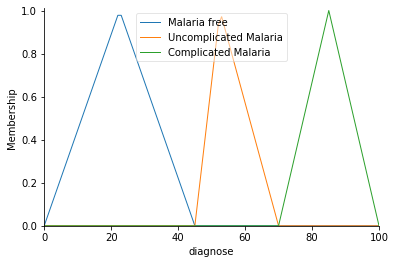

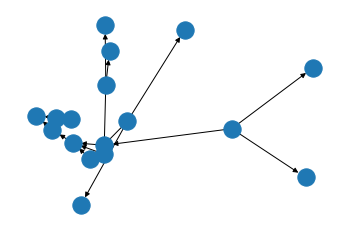

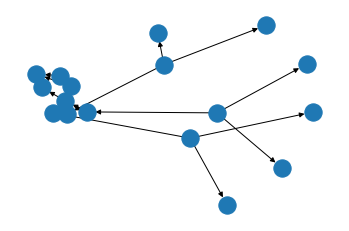

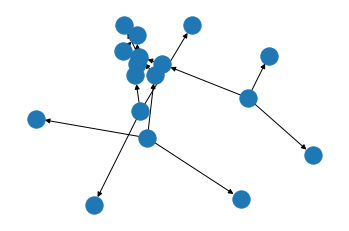

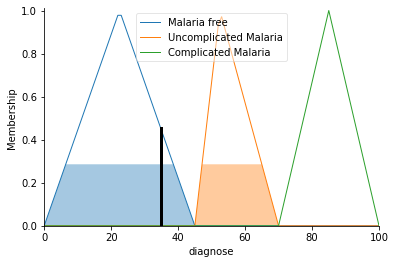

In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import tkinter as tk

# New Antecedent/Consequent objects hold universe variables and membership
# functions
      
        
#####################################################
#####################################################
# Set-up the window
window = tk.Tk()
window.title("Diagnose Patient of Malaria")
window.resizable(width=False, height=False)


def _skfuzzyfunction():
    """Convert the value for Fahrenheit to Celsius and insert the
    result into lbl_result.
    """
    temp=ent_temperature.get()
    bmi=ent_bmi.get()
    pulserate=ent_pulserate.get()
    
    Temperature = ctrl.Antecedent(np.arange(0, 101, 1), 'temperature')
    BMI = ctrl.Antecedent(np.arange(0, 101, 1), 'bmi')
    Pulserate = ctrl.Antecedent(np.arange(0, 101, 1), 'pulserate')
    Diagnose = ctrl.Consequent(np.arange(0,101,1),'diagnose')
    # Auto-membership function population is possible with .automf(3, 5, or 7)


    Temperature['low'] = fuzz.trimf(Temperature.universe, [0, 31, 62])
    Temperature['medium'] = fuzz.trimf(Temperature.universe, [62, 64, 68])
    Temperature['high'] = fuzz.trimf(Temperature.universe, [68, 84, 100])
    BMI['high'] = fuzz.trimf(BMI.universe, [0, 19, 38])
    BMI['medium'] = fuzz.trimf(BMI.universe, [38, 44, 50])
    BMI['low'] = fuzz.trimf(BMI.universe, [50, 75, 100])
    Pulserate['low'] = fuzz.trimf(Pulserate.universe, [0, 35, 70])
    Pulserate['medium'] = fuzz.trimf(Pulserate.universe, [70, 73, 76])
    Pulserate['high'] = fuzz.trimf(Pulserate.universe, [76, 88, 100])
    Diagnose['Malaria free'] = fuzz.trimf(Diagnose.universe, [0, 22.5, 45])
    Diagnose['Uncomplicated Malaria'] = fuzz.trimf(Diagnose.universe, [45, 52.5, 70])
    Diagnose['Complicated Malaria'] = fuzz.trimf(Diagnose.universe, [70, 85, 100])

##
# You can see how these look with .view()
    Temperature.view()
    BMI.view()
    Pulserate.view()
    Diagnose.view()
##\
##


    rule_1 = ctrl.Rule(Temperature['low'] | BMI['low'] | Pulserate['low'], Diagnose['Malaria free'])
    rule_2 = ctrl.Rule(Temperature['medium'] | BMI['medium'] | Pulserate['low'], Diagnose['Uncomplicated Malaria'])
    rule_3 = ctrl.Rule(Temperature['high'] | BMI['high'] | Pulserate['high'],Diagnose['Complicated Malaria'])
    rule_1.view()
    rule_2.view()
    rule_3.view()
    print(temp,bmi,pulserate)
#
    tipping_ctrl = ctrl.ControlSystem([rule_1, rule_2, rule_3])
    tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
    # Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
    # Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
    tipping.input['temperature'] = int(temp)
    tipping.input['bmi'] = int(bmi)
    tipping.input['pulserate'] = int(pulserate)
    # Crunch the numbers
    tipping.compute()
    print(tipping.output['diagnose'])
    Diagnose.view(sim=tipping)
    h=int(tipping.output['diagnose'])
    
    if h<46:
        lbl_result["text"]= f"You don't have Malaria"
    if h >= 46 and h <=70:
        lbl_result["text"]=f"The patient has Uncomplicated Malaria"
    if h>=70 :
        lbl_result["text"]=f"The patient is suffering from Complicated Malaria"
  


# Create the input entry frame with an Entry
# widget and label in it
frm_entry = tk.Frame(master=window)
ent_temperature = tk.Entry(master=frm_entry, width=10)
lbl_temp = tk.Label(master=frm_entry, text="Temperature")
ent_bmi=tk.Entry(master=frm_entry,width=10)
lbl_bmi = tk.Label(master=frm_entry,text="BMI")
ent_pulserate=tk.Entry(master=frm_entry,width=10)
lbl_pulserate=tk.Label(master=frm_entry,text="Pulse Rate")

# Layout the temperature Entry and Label in frm_entry
# using the .grid() geometry manager
ent_temperature.grid(row=0, column=0, sticky="e",padx=10,pady=1)
lbl_temp.grid(row=0, column=1, sticky="w",padx=10,pady=1)
ent_bmi.grid(row=1,column=0,sticky="e",padx=10,pady=1)
lbl_bmi.grid(row=1,column=1,sticky="w",padx=10,pady=1)
ent_pulserate.grid(row=2,column=0,sticky="e",padx=10,pady=1)
lbl_pulserate.grid(row=2,column=1,sticky="w",padx=10,pady=1)

# Create the conversion Button and result display Label

btn_convert = tk.Button(
    master=window,
    text="\N{RIGHTWARDS BLACK ARROW}",
    command=_skfuzzyfunction
)
lbl_result = tk.Label(master=window,)

# Set-up the layout using the .grid() geometry manager
frm_entry.grid(row=0, column=0, padx=20,pady=10)
btn_convert.grid(row=0, column=1, pady=20)
lbl_result.grid(row=0, column=2, padx=20)

##############################
####################################
window.mainloop()